In [2]:
import os
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

/Users/tanwimallick/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


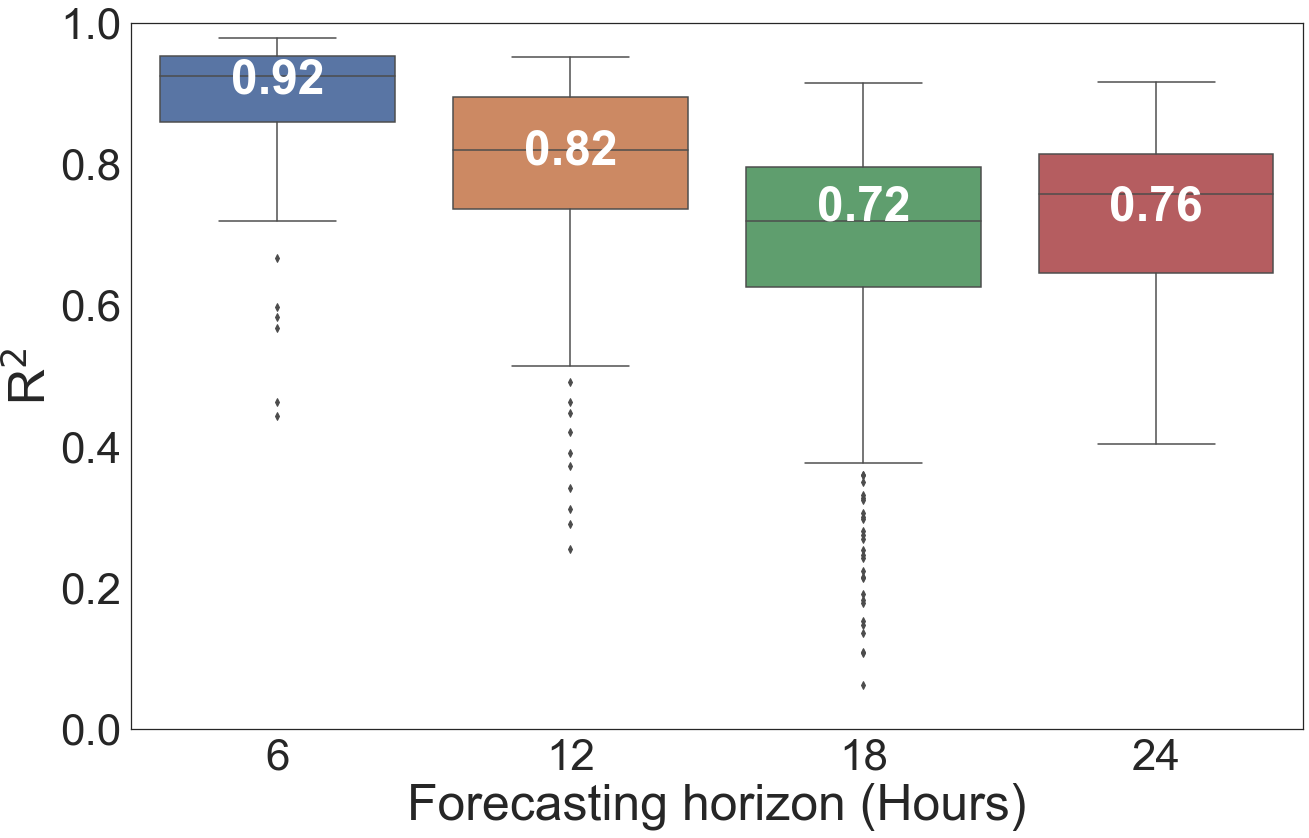

In [9]:
df_DDCRNN_6 = pd.read_csv('Results/Results_DDCRNN_30_6/R2_DCRNN.csv')
df_DDCRNN_12 = pd.read_csv('Results/Results_DDCRNN_30_12/R2_DCRNN.csv')
df_DDCRNN_18 = pd.read_csv('Results/Results_DDCRNN_30_18/R2_DCRNN.csv')
df_DDCRNN_24 = pd.read_csv('Results/Results_DDCRNN_30_24/R2_DCRNN.csv')
df_DDCRNN_6 = df_DDCRNN_6.set_index('sites')
df_DDCRNN_12 = df_DDCRNN_12.set_index('sites')
df_DDCRNN_18 = df_DDCRNN_18.set_index('sites')
df_DDCRNN_24 = df_DDCRNN_24.set_index('sites')
df_new = pd.DataFrame()
df_new['6'] = df_DDCRNN_6.iloc[:,1:25].values.flatten()
additional = pd.DataFrame({'12': df_DDCRNN_12.iloc[:,1:25].values.flatten()})
df_new = pd.concat([df_new,additional], ignore_index=True, axis=1)
additional = pd.DataFrame({'18': df_DDCRNN_18.iloc[:,1:25].values.flatten()})
df_new = pd.concat([df_new,additional], ignore_index=True, axis=1)
additional = pd.DataFrame({'24': df_DDCRNN_24.iloc[:,1:25].values.flatten()})
df_new = pd.concat([df_new,additional], ignore_index=True, axis=1)
df_new.columns = ['6','12','18','24']

mL1 = []
mL1.append(np.round(df_new['6'].median(), decimals=2))
mL1.append(np.round(df_new['12'].median(), decimals=2))
mL1.append(np.round(df_new['18'].median(), decimals=2))
mL1.append(np.round(df_new['24'].median(), decimals=2))

sns.set(rc={'figure.figsize':(21,13)})
sns.set(font_scale = 4, style="white")
testPlot = sns.boxplot(data=df_new)

top = 0.75 #m1[ind+1]+1
for tick in range(len(mL1)):
    if tick == 0:
         top = 0.9
    elif tick == 1:
        top = 0.8
    else:
        top = 0.72 
    testPlot.text(tick, top, mL1[tick],  horizontalalignment='center',  color='w', weight='semibold')

plt.ylim(0, 1)
testPlot.set_xlabel('Forecasting horizon (Hours)', fontsize=50)  
testPlot.set_ylabel('R$^2$', fontsize=50)  


plt.savefig('/Users/tanwimallick/Desktop/esnet_plots/impact_horizon.png')

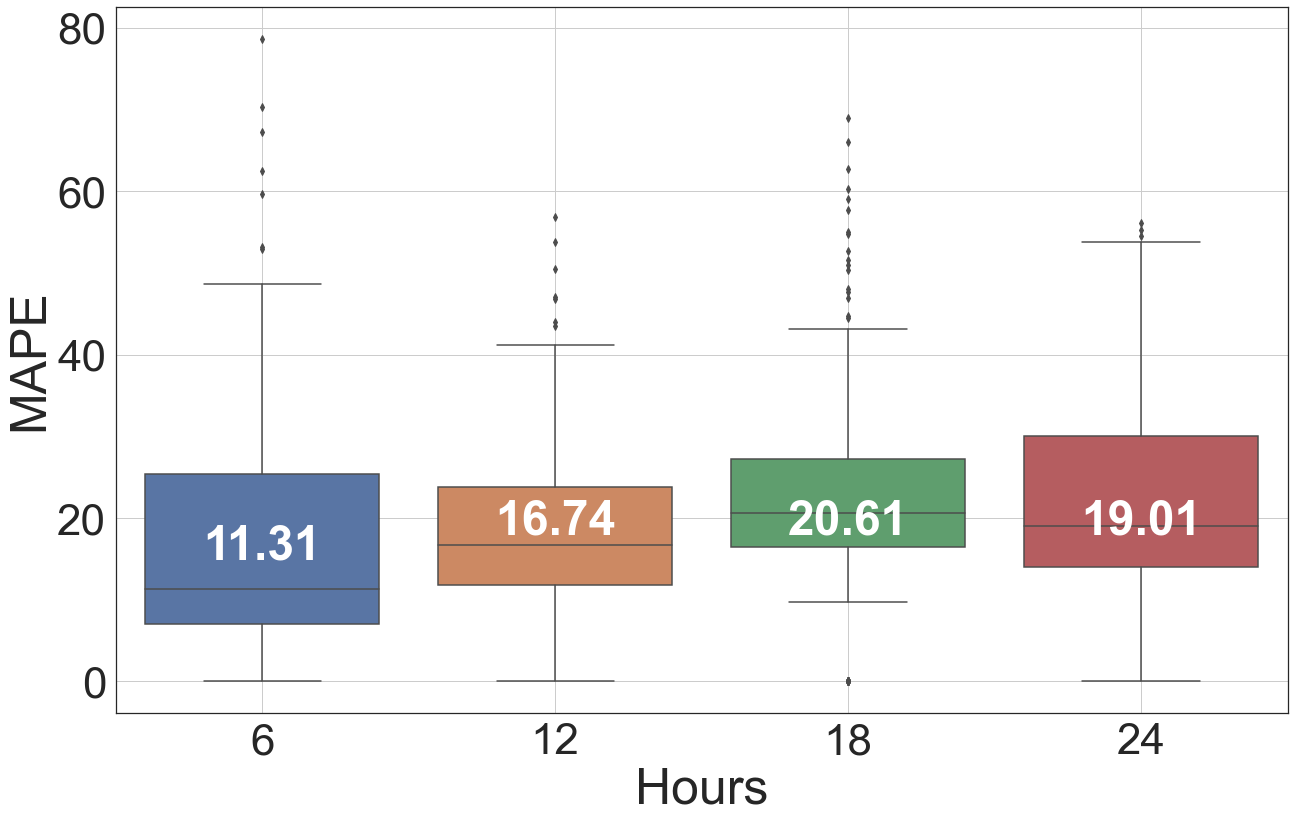

In [10]:
df_DDCRNN_6 = pd.read_csv('Results/Results_DDCRNN_30_6/MAPE_DCRNN.csv')
df_DDCRNN_12 = pd.read_csv('Results/Results_DDCRNN_30_12/MAPE_DCRNN.csv')
df_DDCRNN_18 = pd.read_csv('Results/Results_DDCRNN_30_18/MAPE_DCRNN.csv')
df_DDCRNN_24 = pd.read_csv('Results/Results_DDCRNN_30_24/MAPE_DCRNN.csv')

df_DDCRNN_6 = df_DDCRNN_6.set_index('sites')
df_DDCRNN_12 = df_DDCRNN_12.set_index('sites')
df_DDCRNN_18 = df_DDCRNN_18.set_index('sites')
df_DDCRNN_24 = df_DDCRNN_24.set_index('sites')


df_new = pd.DataFrame({'sn':np.arange(300)})
df_new['6'] = pd.Series(df_DDCRNN_6.iloc[:,1:25].values.flatten())
df_new['12'] = pd.Series(df_DDCRNN_12.iloc[:,1:25].values.flatten())
df_new['18'] = pd.Series(df_DDCRNN_18.iloc[:,1:25].values.flatten())
df_new['24'] = pd.Series(df_DDCRNN_24.iloc[:,1:25].values.flatten())
del df_new['sn']


mL1 = []
mL1.append(np.round(df_new['6'].median(), decimals=2))
mL1.append(np.round(df_new['12'].median(), decimals=2))
mL1.append(np.round(df_new['18'].median(), decimals=2))
mL1.append(np.round(df_new['24'].median(), decimals=2))


sns.set(rc={'figure.figsize':(21,13)})
sns.set(font_scale = 4, style="white")
testPlot = sns.boxplot(data=df_new)

top = 18.5 #m1[ind+1]+1
for tick in range(len(mL1)):
    if tick == 0:
        top = 15 
    else:
        top = 18
    testPlot.text(tick, top, mL1[tick],  horizontalalignment='center',  color='w', weight='semibold')

#plt.ylim(0, 1)
testPlot.set_xlabel('Hours', fontsize=50)  
testPlot.set_ylabel('MAPE', fontsize=50)  
plt.grid()

plt.savefig('/Users/tanwimallick/Desktop/esnet_plots/impact_horizon_MAPE.png')